In [ ]:
###USAMOS LA LIBRERÍA TENSORFLOW PARA EL MODELAMIENTO DE UNA RED NEURONAL QUE
###PRONOSTIQUE LA FEDRATE

In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
import pandas as pd


data_lstm = pd.read_excel('Final-Data.xlsx')
data_lstm = data_lstm[['INDEX1', 'FEDRATE', 'Inflation GAP', 'Output GAP']]

# Escalando los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_lstm)

# Separando los datos en características (X) y objetivo (y)
X = scaled_data[:, 1:]  # Todas las columnas excepto FEDRATE
y = scaled_data[:, 0]  # Solo la columna FEDRATE

# Redimensionando X para LSTM
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construcción del modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compilación del modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenamiento del modelo
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)


Epoch 1/100
2/2 [==============================] - 4s 20ms/step - loss: 0.3108
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 0.2975
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 0.2845
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 0.2713
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 0.2582
Epoch 6/100
2/2 [==============================] - 0s 12ms/step - loss: 0.2450
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 0.2317
Epoch 8/100
2/2 [==============================] - 0s 13ms/step - loss: 0.2178
Epoch 9/100
2/2 [==============================] - 0s 12ms/step - loss: 0.2040
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 0.1901
Epoch 11/100
2/2 [==============================] - 0s 12ms/step - loss: 0.1762
Epoch 12/100
2/2 [==============================] - 0s 11ms/step - loss: 0.1621
Epoch 13/100
2/2 [==============================]

Train Loss: 0.05270108953118324, Test Loss: 0.04109855368733406
1/1 [==============================] - 0s 22ms/step


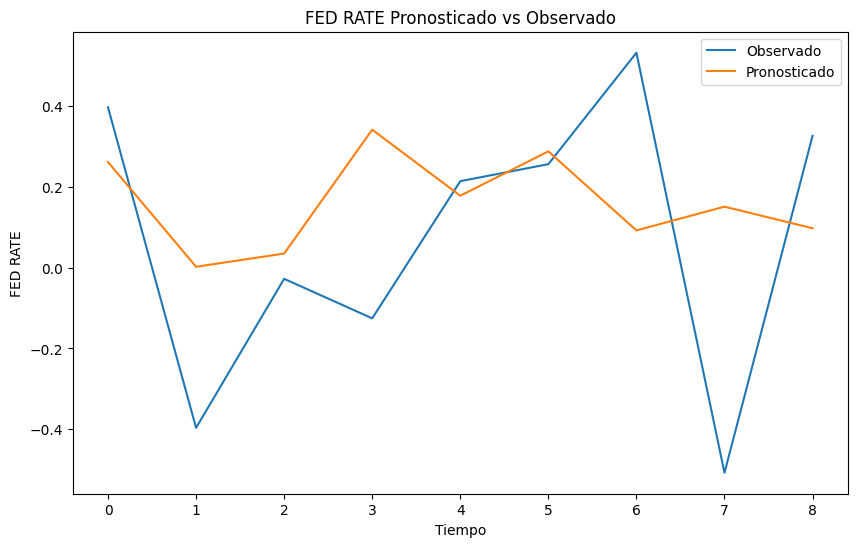

In [4]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Evaluar el modelo
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Train Loss: {train_loss}, Test Loss: {test_loss}")

# Realizar predicciones
predictions = model.predict(X_test)


predictions = predictions.reshape(-1, 1)
y_test_scaled = y_test.reshape(-1, 1)

# Preparar un array para el inverso del escalado que solo contenga los valores de FEDRATE
fedrate_scaler = MinMaxScaler()
fedrate_scaler.min_, fedrate_scaler.scale_ = scaler.min_[0], scaler.scale_[0]

# Aplicar el inverso del escalado a las predicciones y a los valores reales
predictions_original = fedrate_scaler.inverse_transform(predictions)
y_test_original = fedrate_scaler.inverse_transform(y_test_scaled)

# Comparación visual de los valores pronosticados vs observados
plt.figure(figsize=(10, 6))
plt.plot(y_test_original, label='Observado')
plt.plot(predictions_original, label='Pronosticado')
plt.title('FED RATE Pronosticado vs Observado')
plt.xlabel('Tiempo')
plt.ylabel('FED RATE')
plt.legend()
plt.show()

